# With PySpark we will transform the data.
#### Importing Necessary Libraries and Initiating Spark

In [1]:
import os
import sys
os.environ["PYSPARK_PYTHON"] = "/opt/cloudera/parcels/Anaconda/bin/python"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_232-cloudera/jre"
os.environ["SPARK_HOME"]="/opt/cloudera/parcels/SPARK2-2.3.0.cloudera2-1.cdh5.13.3.p0.316101/lib/spark2/"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.6-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1670845557400_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('demo').master("local").getOrCreate()
sc = spark.sparkContext

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Reading the file via Spark which we ingested through Sqoop.
### We will infer existing schema to load data.

In [3]:
df = spark.read.csv("/user/root/ETL_Spar_ATM/part-m-00000", header = False, inferSchema = True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Checking data

In [4]:
df.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+------+---+--------+---+---+----------+-----------+----+----+------+------+----+----------+----+----------+----+----+------+------+-------+--------------+------+----+----+----+----+-----+----+----+----+----------+
| _c0|    _c1|_c2|   _c3|_c4|     _c5|_c6|_c7|       _c8|        _c9|_c10|_c11|  _c12|  _c13|_c14|      _c15|_c16|      _c17|_c18|_c19|  _c20|  _c21|   _c22|          _c23|  _c24|_c25|_c26|_c27|_c28| _c29|_c30|_c31|_c32|      _c33|
+----+-------+---+------+---+--------+---+---+----------+-----------+----+----+------+------+----+----------+----+----------+----+----+------+------+-------+--------------+------+----+----+----+----+-----+----+----+----+----------+
|2017|January|  1|Sunday|  0|  Active|  1|NCR|NÃƒÂ¦stved|Farimagsvej|   8|4700|55.233|11.763| DKK|MasterCard|5643|Withdrawal|null|null| 55.23|11.761|2616038|      Naestved|281.15|1014|  87|   7| 260|0.215|  92| 500|Rain|light rain|
|2017|January|  1|Sunday|  0|Inactive|  2|NCR|  Vejgaard| Hadsundvej|  2

#### Change Dataset Schema using StructType

In [5]:
# Importing required modules and libraries
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DoubleType, LongType

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Let's create our own Schema for our dataset

In [6]:
Schema = StructType([StructField('year', IntegerType(), nullable = True),
                        StructField('month', StringType(), True),
                        StructField('day', IntegerType(), True),
                        StructField('weekday', StringType(), True),
                        StructField('hour', IntegerType(), True),
                        StructField('atm_status', StringType(), True),
                        StructField('atm_id', StringType(), True),
                        StructField('atm_manufacturer', StringType(), True),
                        StructField('atm_location', StringType(), True),
                        StructField('atm_streetname', StringType(), True),
                        StructField('atm_street_number', IntegerType(), True),
                        StructField('atm_zipcode', IntegerType(), True),
                        StructField('atm_lat', DoubleType(), True),
                        StructField('atm_lon', DoubleType(), True),
                        StructField('currency', StringType(), True),
                        StructField('card_type', StringType(), True),
                        StructField('transaction_amount', IntegerType(), True),
                        StructField('service', StringType(), True),
                        StructField('message_code', StringType(), True),
                        StructField('message_text', StringType(), True),
                        StructField('weather_lat', DoubleType(), True),
                        StructField('weather_lon', DoubleType(), True),
                        StructField('weather_city_id', IntegerType(), True),
                        StructField('weather_city_name', StringType(), True),
                        StructField('temp', DoubleType(), True),
                        StructField('pressure', IntegerType(), True),
                        StructField('humidity', IntegerType(), True),
                        StructField('wind_speed', IntegerType(), True),
                        StructField('wind_deg', IntegerType(), True),
                        StructField('rain_3h', DoubleType(), True),
                        StructField('clouds_all', IntegerType(), True),
                        StructField('weather_id', IntegerType(), True),
                        StructField('weather_main', StringType(), True),
                        StructField('weather_description', StringType(), True)])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Now Let's infer created schema on our dataset

In [7]:
df = spark.read.csv("/user/root/ETL_Spar_ATM/part-m-00000", header = False, schema = Schema)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
# Check records
df.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

#### Check created Schema

In [9]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_id: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- currency: string (nullable = true)
 |-- card_type: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name: st

In [10]:
df.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+-------+----+----------+------+----------------+------------+--------------+-----------------+-----------+-------+-------+--------+----------+------------------+----------+------------+------------+-----------+-----------+---------------+-----------------+------+--------+--------+----------+--------+-------+----------+----------+------------+-------------------+
|year|  month|day|weekday|hour|atm_status|atm_id|atm_manufacturer|atm_location|atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|currency| card_type|transaction_amount|   service|message_code|message_text|weather_lat|weather_lon|weather_city_id|weather_city_name|  temp|pressure|humidity|wind_speed|wind_deg|rain_3h|clouds_all|weather_id|weather_main|weather_description|
+----+-------+---+-------+----+----------+------+----------------+------------+--------------+-----------------+-----------+-------+-------+--------+----------+------------------+----------+------------+------------+-----------+------

In [11]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['year', 'month', 'day', 'weekday', 'hour', 'atm_status', 'atm_id', 'atm_manufacturer', 'atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon', 'currency', 'card_type', 'transaction_amount', 'service', 'message_code', 'message_text', 'weather_lat', 'weather_lon', 'weather_city_id', 'weather_city_name', 'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description']

# Now we need to create all dimension and Fact tables from this data 

## Let's create Location Dimension Table

In [12]:
# creating a location dataframe with distinct data
location = df.select('atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
from pyspark.sql.functions import *
# Primary key
df_temp = location.rdd.zipWithIndex().toDF()
dim_location = df_temp.select(col("_1.*"),col("_2").alias('location_id'))
dim_location.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-------------------+-----------------+-----------+-------+-------+-----------+
|    atm_location|     atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|location_id|
+----------------+-------------------+-----------------+-----------+-------+-------+-----------+
|         Kolding|           Vejlevej|              135|       6000| 55.505|  9.457|          0|
|  Skelagervej 15|        Skelagervej|               15|       9000| 57.023|  9.891|          1|
|Intern HolbÃƒÂ¦k|        Slotsvolden|                7|       4300| 55.718| 11.704|          2|
|          Odense|       FÃƒÂ¦lledvej|                3|       5000| 55.394|  10.37|          3|
|           Ikast|RÃƒÂ¥dhusstrÃƒÂ¦det|               12|       7430| 56.139|  9.154|          4|
+----------------+-------------------+-----------------+-----------+-------+-------+-----------+
only showing top 5 rows

In [14]:
# renaming the colums as per requirement and rearranging columns
DIM_LOCATION = dim_location.withColumnRenamed('atm_location','location').withColumnRenamed('atm_streetname','streetname').withColumnRenamed('atm_street_number','street_number').withColumnRenamed('atm_zipcode','zipcode').withColumnRenamed('atm_lat','lat').withColumnRenamed('atm_lon','lon')
DIM_LOCATION = DIM_LOCATION.select('location_id', 'location', 'streetname', 'street_number', 'zipcode', 'lat', 'lon')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
DIM_LOCATION.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['location_id', 'location', 'streetname', 'street_number', 'zipcode', 'lat', 'lon']

In [16]:
# validating the count of the dataframe
DIM_LOCATION.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

109

### Creating ATM Dimension 

In [17]:
# creating a temporary df and selecting required columns
atm = df.select('atm_id', 'atm_manufacturer', 'atm_lat', 'atm_lon')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
# renaming the column atm_id to atm_number as per requirement
atm = atm.withColumnRenamed('atm_id', 'atm_number')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# joining the dim_location and atm dataframes
atm = atm.join(dim_location, on = ['atm_lat', 'atm_lon'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
atm.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['atm_lat', 'atm_lon', 'atm_number', 'atm_manufacturer', 'atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'location_id']

In [21]:
# selecting the required columns and making sure records are distinct
atm = atm.select('atm_number', 'atm_manufacturer', 'location_id').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
# renaming the colums as per requirement
atm = atm.withColumnRenamed('location_id', 'atm_location_id')
atm.columns

# creating the primary key column
df_temp = atm.rdd.zipWithIndex().toDF()
dim_atm = df_temp.select(col("_1.*"),col("_2").alias('atm_id'))
dim_atm.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----------------+---------------+------+
|atm_number|atm_manufacturer|atm_location_id|atm_id|
+----------+----------------+---------------+------+
|        53|             NCR|             28|     0|
|        30|             NCR|             57|     1|
|        36|             NCR|             61|     2|
|        40| Diebold Nixdorf|             86|     3|
|        66|             NCR|             20|     4|
+----------+----------------+---------------+------+
only showing top 5 rows

In [23]:
# rearranging the columns according to the target model
DIM_ATM = dim_atm.select('atm_id', 'atm_number', 'atm_manufacturer', 'atm_location_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
DIM_ATM.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['atm_id', 'atm_number', 'atm_manufacturer', 'atm_location_id']

In [25]:
DIM_ATM.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

156

#### Creating a dataframe for Date Dimension according to Target Dimension Model

In [26]:
# creating a temporary df and selecting required columns
date = df.select('year', 'month', 'day', 'hour', 'weekday')
date = date.withColumn('full_date', concat_ws('-', date.year, date.month, date.day))
date = date.withColumn('full_time', concat_ws(':', date.hour, lit('00'), lit('00')))
date = date.withColumn('full_date_time', concat_ws(' ', date.full_date, date.full_time))
pattern = 'yyyy-MMM-dd HH:mm:ss'
date = date.withColumn('full_date_time', unix_timestamp(date.full_date_time, pattern).cast('timestamp'))
date.show(5, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+----+-------+--------------+---------+-------------------+
|year|month  |day|hour|weekday|full_date     |full_time|full_date_time     |
+----+-------+---+----+-------+--------------+---------+-------------------+
|2017|January|1  |0   |Sunday |2017-January-1|0:00:00  |2017-01-01 00:00:00|
|2017|January|1  |0   |Sunday |2017-January-1|0:00:00  |2017-01-01 00:00:00|
|2017|January|1  |0   |Sunday |2017-January-1|0:00:00  |2017-01-01 00:00:00|
|2017|January|1  |0   |Sunday |2017-January-1|0:00:00  |2017-01-01 00:00:00|
|2017|January|1  |0   |Sunday |2017-January-1|0:00:00  |2017-01-01 00:00:00|
+----+-------+---+----+-------+--------------+---------+-------------------+
only showing top 5 rows

In [27]:
# selecting the required columns and making sure records are distinct
date = date.select('year', 'month', 'day', 'hour', 'weekday', 'full_date_time').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# creating the primary key column
df_temp = date.rdd.zipWithIndex().toDF()
DIM_DATE = df_temp.select(col("_1.*"),col("_2").alias('date_id'))
DIM_DATE.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+--------+---+----+--------+-------------------+-------+
|year|   month|day|hour| weekday|     full_date_time|date_id|
+----+--------+---+----+--------+-------------------+-------+
|2017|February| 26|   8|  Sunday|2017-02-26 08:00:00|      0|
|2017|   March| 14|   6| Tuesday|2017-03-14 06:00:00|      1|
|2017|   March| 28|  12| Tuesday|2017-03-28 12:00:00|      2|
|2017|   March| 12|  13|  Sunday|2017-03-12 13:00:00|      3|
|2017|   March| 23|  23|Thursday|2017-03-23 23:00:00|      4|
+----+--------+---+----+--------+-------------------+-------+
only showing top 5 rows

In [29]:
# rearranging the columns according to the target model
DIM_DATE = DIM_DATE.select('date_id', 'full_date_time', 'year', 'month', 'day', 'hour', 'weekday')
# checking that all required columns are present and named correctly
DIM_DATE.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['date_id', 'full_date_time', 'year', 'month', 'day', 'hour', 'weekday']

In [30]:
df_temp.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---+
|                  _1| _2|
+--------------------+---+
|[2017, January, 6...|  0|
+--------------------+---+
only showing top 1 row

In [31]:
# validating the count of the dataframe
DIM_DATE.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8685

## Creating a dataframe for Card Type Dimension according to Target Dimension Model

In [32]:
# creating a temporary df and selecting required columns and making sure records are distinct
card_type = df.select('card_type').distinct()

# creating the primary key column
df_temp = card_type.rdd.zipWithIndex().toDF()
DIM_CARD_TYPE = df_temp.select(col("_1.*"),col("_2").alias('card_type_id'))
DIM_CARD_TYPE.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|           card_type|card_type_id|
+--------------------+------------+
|Visa Dankort - on-us|           0|
|  Mastercard - on-us|           1|
|         HÃƒÂ¦vekort|           2|
|            VisaPlus|           3|
|     Dankort - on-us|           4|
+--------------------+------------+
only showing top 5 rows

In [33]:
# rearranging the columns according to the target model
DIM_CARD_TYPE = DIM_CARD_TYPE.select('card_type_id', 'card_type')

# checking that all required columns are present and named correctly
DIM_CARD_TYPE.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['card_type_id', 'card_type']

In [34]:
# validating the count of the dataframe
DIM_CARD_TYPE.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

## Creating the Transaction Fact Table according to Target Model

In [35]:
# renaming the colums as per requirement
fact_loc = df.withColumnRenamed('atm_location','location').withColumnRenamed('atm_streetname','streetname').withColumnRenamed('atm_street_number','street_number').withColumnRenamed('atm_zipcode','zipcode').withColumnRenamed('atm_lat','lat').withColumnRenamed('atm_lon','lon')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
# joining the dfs
fact_loc = fact_loc.join(DIM_LOCATION, on = ['location', 'streetname', 'street_number', 'zipcode', 'lat', 'lon'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
# viewing the columns
fact_loc.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['location', 'streetname', 'street_number', 'zipcode', 'lat', 'lon', 'year', 'month', 'day', 'weekday', 'hour', 'atm_status', 'atm_id', 'atm_manufacturer', 'currency', 'card_type', 'transaction_amount', 'service', 'message_code', 'message_text', 'weather_lat', 'weather_lon', 'weather_city_id', 'weather_city_name', 'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description', 'location_id']

In [38]:
# Validating the count of the df at the end of Stage 1
fact_loc.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

In [39]:
# Stage 2 of FACT_ATM_TRANS Table -> joining the dataframe with DIM_ATM
# renaming the colums as per requirement
fact_loc = fact_loc.withColumnRenamed('atm_id', 'atm_number').withColumnRenamed('location_id', 'atm_location_id')

# joining the dfs
fact_atm = fact_loc.join(DIM_ATM, on = ['atm_number', 'atm_manufacturer', 'atm_location_id'], how = "left")

# performing necessary transformations, same as done to atm table
fact_atm = fact_atm.withColumnRenamed('atm_location_id', 'weather_loc_id')

# Validating the count of the df at the end of Stage 2
fact_atm.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

In [40]:
# joining the dfs
fact_date = fact_atm.join(DIM_DATE, on = ['year', 'month', 'day', 'hour', 'weekday'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
# Validating the count of the df at the end of Stage 3
fact_date.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

In [42]:
# joining the dfs
fact_atm_trans = fact_date.join(DIM_CARD_TYPE, on = ['card_type'], how = "left")
# Validating the count of the df at the end of Stage 4
fact_atm_trans.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

In [43]:
# creating primary key of fact table and viewing 1st record of the table
from pyspark.sql.window import Window

w = Window().orderBy('date_id')
FACT_ATM_TRANS = fact_atm_trans.withColumn("trans_id", row_number().over(w))
FACT_ATM_TRANS.show(1, True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----+-------+---+----+-------+----------+----------------+--------------+--------------+-----------+-------------+-------+------+-----+----------+--------+------------------+----------+------------+------------+-----------+-----------+---------------+-----------------+-------+--------+--------+----------+--------+-------+----------+----------+------------+-------------------+------+-------+-------------------+------------+--------+
| card_type|year|  month|day|hour|weekday|atm_number|atm_manufacturer|weather_loc_id|      location| streetname|street_number|zipcode|   lat|  lon|atm_status|currency|transaction_amount|   service|message_code|message_text|weather_lat|weather_lon|weather_city_id|weather_city_name|   temp|pressure|humidity|wind_speed|wind_deg|rain_3h|clouds_all|weather_id|weather_main|weather_description|atm_id|date_id|     full_date_time|card_type_id|trans_id|
+----------+----+-------+---+----+-------+----------+----------------+--------------+--------------+----

In [44]:
# viewing the list of columns
FACT_ATM_TRANS.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['card_type', 'year', 'month', 'day', 'hour', 'weekday', 'atm_number', 'atm_manufacturer', 'weather_loc_id', 'location', 'streetname', 'street_number', 'zipcode', 'lat', 'lon', 'atm_status', 'currency', 'transaction_amount', 'service', 'message_code', 'message_text', 'weather_lat', 'weather_lon', 'weather_city_id', 'weather_city_name', 'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description', 'atm_id', 'date_id', 'full_date_time', 'card_type_id', 'trans_id']

In [45]:
# selecting and arranging only the required columns according to the target model
FACT_ATM_TRANS = FACT_ATM_TRANS.select('trans_id', 'atm_id', 'weather_loc_id', 'date_id', 'card_type_id', 
'atm_status', 'currency', 'service', 'transaction_amount', 'message_code', 'message_text', 'rain_3h', 
'clouds_all', 'weather_id', 'weather_main', 'weather_description')

FACT_ATM_TRANS.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['trans_id', 'atm_id', 'weather_loc_id', 'date_id', 'card_type_id', 'atm_status', 'currency', 'service', 'transaction_amount', 'message_code', 'message_text', 'rain_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description']

In [46]:
FACT_ATM_TRANS.select('*').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

# Now we will save these PySpark Dataframes to AWS S3 Storage in csv format

#### We have created "upgradetlhardikradhikaabhay" bucket in S3, which we will use to store our all dataset.

In [47]:
# writing data from pyspark df 'dim_location' in csv format to dim_location folder in S3 bucket 'upgradetlhardikradhikaabhay'
DIM_LOCATION.coalesce(1).write.format('csv').option('header','false').save('s3://upgradetlhardikradhikaabhay/dim_location', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
# writing data from pyspark df 'dim_atm' in csv format to dim_atm folder in S3 bucket 'upgradetlhardikradhikaabhay'
DIM_ATM.coalesce(1).write.format('csv').option('header','false').save('s3://upgradetlhardikradhikaabhay/dim_atm', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
# writing data from pyspark df 'dim_atm' in csv format to dim_atm folder in S3 bucket 'upgradetlhardikradhikaabhay'
DIM_ATM.coalesce(1).write.format('csv').option('header','false').save('s3://upgradetlhardikradhikaabhay/dim_atm', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
# writing data from pyspark df 'dim_data' in csv format to dim_data folder in S3 bucket 'upgradetlhardikradhikaabhay'
DIM_DATE.coalesce(1).write.format('csv').option('header','false').save('s3://upgradetlhardikradhikaabhay/dim_date', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
# writing data from pyspark df 'dim_card_type' in csv format to dim_card_type folder in S3 bucket 'upgradetlhardikradhikaabhay'
DIM_CARD_TYPE.coalesce(1).write.format('csv').option('header','false').save('s3://upgradetlhardikradhikaabhay/dim_card_type', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
# writing data from pyspark df 'fact_atm_trans' in csv format to fact_atm_trans folder in S3 bucket 'upgradetlhardikradhikaabhay'
FACT_ATM_TRANS.coalesce(1).write.format('csv').option('header','false').save('s3://upgradetlhardikradhikaabhay/fact_atm_trans', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Now all files are saved at S3 at "upgradetlhardikradhikaabhay" bucket.
#### This location we will use further.


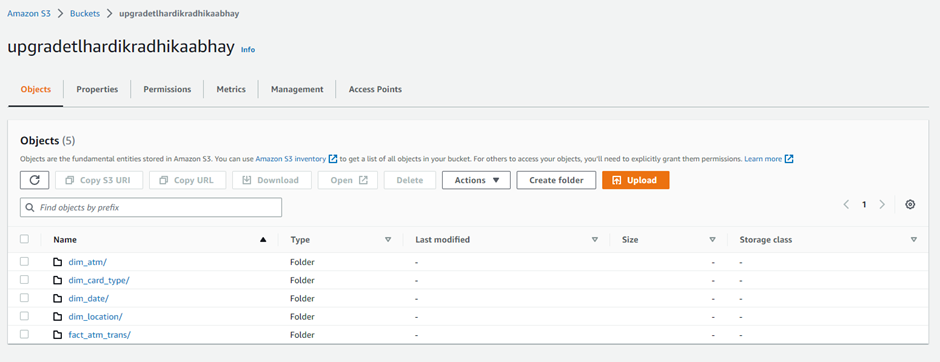
